Make sure that the folder in which you want to save actually exists beforehand

Be sure to mount your drive if you want to save to your drive folder


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

#Finding the optimal K using silhoutte score

#***Set parameters***

In [4]:
__algo__ = "OptimalK" #Name of the algorithm
recnum = 10000 #Number of records to be read from files
kmax = 500 #Max number of clusters

usesqrt = False #Set value of k to sqrt of recnum
randomsample = True #Sampling to be True/False for reacords which are read


# mention ./ at the start of folder and /. at the end
# example "./testfolder/."
# savefolder = "./OptiK/."
# # savefolder = "./TestFolder/."

#Bash Code
Git all the Required Files

In [5]:
# !git clone https://github.com/DevashishX/AbstractClustering.git;
# !cp -r AbstractClustering/* ./.
# !ls -alFh

#Actual Code

#imports and time

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
import seaborn as sns
import os, subprocess
import pickle
import datetime, time


In [7]:
start_time = time.time()
start_datetime = datetime.datetime.now()
print("start_time: ", start_time)
print("start_datetime: ", start_datetime)
# print(datetime.datetime.now()-start_datetime)

start_time:  1582989287.783227
start_datetime:  2020-02-29 20:44:47.783271


#File Settings

In [8]:
embedDir = "./MegaSentEmbs/"
dumpdir = "./dump/"
oldlist = os.listdir(embedDir)
filelist = sorted([embedDir+f for f in oldlist if f[-3:]=="pkl"])
filenum = int(len(filelist))
# filenum = 5
smalllist = filelist[:filenum]
print("Length of Smalllist: ", len(smalllist))

Length of Smalllist:  116


#Number of Records
It is Recommended to Set this at the top parameters

In [9]:
recnum = recnum

#Read all the pandas dataframes

In [10]:
%%time
megadf = pd.DataFrame()

if randomsample == True:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
    megadf = megadf.sample(recnum, random_state=42)
else:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
        if megadf.shape[0] >= recnum:
            megadf = megadf[:recnum]
            break

print("megadf.shape: ", megadf.shape)
print("megadf.head:\n", megadf.head())

randomsample:  True
megadf.shape:  (10000, 4)
megadf.head:
              id                                              title  \
267625  1586358  Health professionals and ethnic Pakistanis in ...   
132693  1514579                    Web Analysis and Design - Build   
42457   1352013  The host of GRB 060206 : kinematics of a dista...   
11052   9050181  Postexercise Muscle Glycogen Synthesis with Co...   
13984    397771  Development of a mixed boundary environment fo...   

                                                 abstract  \
267625  [central, theme, red, thread, consider, thesis...   
132693  [reading, material, form, part, build, topic, ...   
42457   [context, grb, afterglow, spectrum, sensitive,...   
11052   [purpose, evaluate, efficacy, using, combined,...   
13984   [geometrically, axi, symmetric, system, freque...   

                                                embedding  
267625  [0.2519249216165414, 0.098715185112782, -0.218...  
132693  [0.45556149999999995, 0.

In [11]:
predata = megadf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(10000, 250)


#Number of Clusters
It is Recommended to Set this at the top parameters

In [48]:
from sklearn.metrics import silhouette_score
savedict = {"k" : [], "silhouette_score" : [], "time" : [], "seconds" : []}
goodk = 0
goodss = 0
kmax = 10
print("Kmax is ", kmax)

Kmax is  10


#Clustering

In [53]:
%%time
savedict = {"k" : [], "silhouette_score" : [], "time" : [], "seconds" : []}
for k in range(2, kmax+1):
    # print("Starting Clustering Process for k = {}".format(k))
    fit_start_datetime = datetime.datetime.now()
    model = cluster.KMeans(n_clusters=k, verbose=1, n_jobs=-1)
    model.fit(data)
    fit_end_datetime = datetime.datetime.now()
    total_fit_datetime = fit_end_datetime - fit_start_datetime
    centroids = model.cluster_centers_
    labels = model.labels_
    ss = silhouette_score(data, labels, metric = 'euclidean')
    print("k = {} done! time taken: {} silhouette_score: {}".format(k, total_fit_datetime, ss))
    savedict["k"].append(k)
    savedict["silhouette_score"].append(ss)
    savedict["time"].append(total_fit_datetime)
    savedict["seconds"].append(int(total_fit_datetime.total_seconds()))
    # savedf = pd.from_dict(savedict)
    # megadf["clusterlabel"]=labels

print("Calculating clusters for K done")

k = 2 done! time taken: 0:00:03.758433 silhouette_score: 0.1868668430609199
k = 3 done! time taken: 0:00:02.646069 silhouette_score: 0.1804656642441156
k = 4 done! time taken: 0:00:03.641755 silhouette_score: 0.08838869344849443
k = 5 done! time taken: 0:00:04.024076 silhouette_score: 0.09419281672756603
k = 6 done! time taken: 0:00:05.921001 silhouette_score: 0.10251744235636334
k = 7 done! time taken: 0:00:08.439336 silhouette_score: 0.0909170239987939
k = 8 done! time taken: 0:00:07.627784 silhouette_score: 0.08116578598756916
k = 9 done! time taken: 0:00:06.638518 silhouette_score: 0.07627823499950719
k = 10 done! time taken: 0:00:07.003149 silhouette_score: 0.0861192833867731
Calculating clusters for K done
CPU times: user 23.1 s, sys: 2.17 s, total: 25.3 s
Wall time: 1min 3s


###Saving the output data into vars

In [50]:
# centroids = model.cluster_centers_
# from pprint import pprint
# labels = model.labels_
# megadf["clusterlabel"]=labels
# megadf["centroids"] = centroids
# centroidDF = pd.DataFrame(centroids)
savedf = pd.DataFrame(savedict)
# pprint(savedict)


#Plotting

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters KMax = 10')

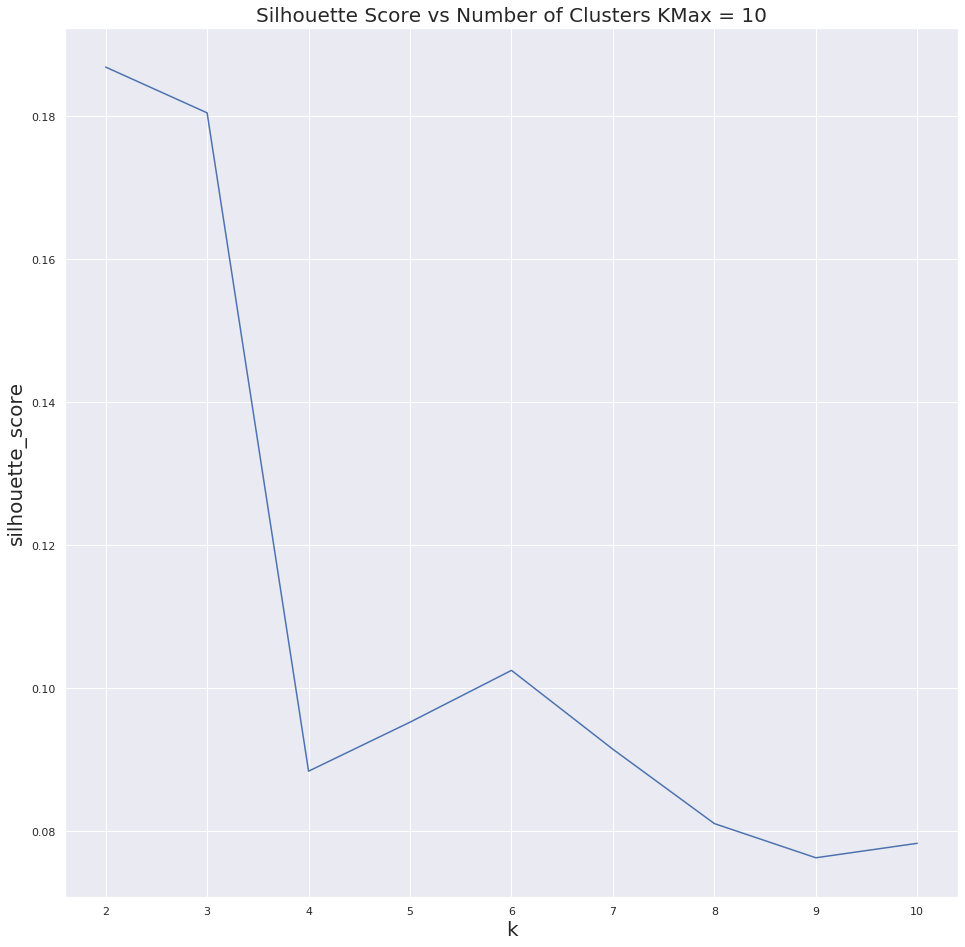

In [51]:
plt.figure(figsize=(16,16))
sns.set(style='darkgrid')
# snsplot = sns.countplot("clusterlabel", data=megadf)
snsplot = sns.lineplot(x="k", y="silhouette_score", data = savedf)
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        "Silhouette Score vs Number of Clusters KMax = {}".format(kmax),
        fontdict = {'fontsize' : 20}
    )

Text(0.5, 1.0, 'Time vs Number of Clusters KMax = 10')

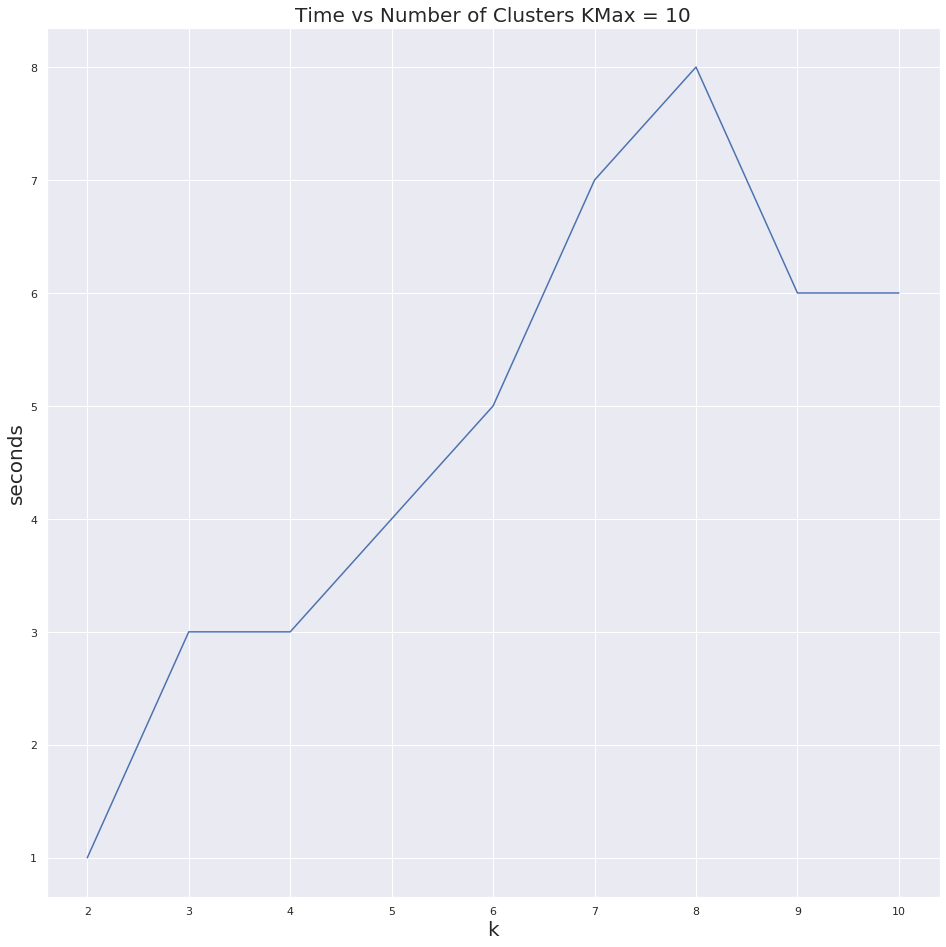

In [52]:
plt.figure(figsize=(16,16))
sns.set(style='darkgrid')
# snsplot = sns.countplot("clusterlabel", data=megadf)
snsplot = sns.lineplot(x="k", y="seconds", data = savedf)
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        "Time vs Number of Clusters KMax = {}".format(kmax),
        fontdict = {'fontsize' : 20}
    )

#Name of the Model

In [19]:
name = "{}_K{}_R{}_F{}".format(__algo__, kmax, data.shape[0], data.shape[1])
name

'OptimalK_K10_R10000_F250'

#Saving Data

In [ ]:
# os.environ["SAVE_FLDR"] = savefolder

In [ ]:
# modelname = "{}_model.pkl".format(name)
# pickle.dump(model, open(modelname, 'wb'))
# os.environ["SAVE_DF"] = modelname
# !cp $SAVE_DF $SAVE_FLDR

In [20]:
ssdataname = "{}_data.pkl".format(name)
savedf.to_pickle(ssdataname)
os.environ["SAVE_DF"] = ssdataname
# !cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

In [21]:
snspltname = "{}_plt.png".format(name)
snsplot.figure.savefig(snspltname)
os.environ["SAVE_DF"] = snspltname
# !cp $SAVE_DF ./drive/My\ Drive/ColabOutput/.

In [ ]:
# clusterdfname = "{}_labeled.pkl".format(name)
# megadf.to_pickle(clusterdfname)
# os.environ["SAVE_DF"] = clusterdfname
# !cp $SAVE_DF $SAVE_FLDR

In [ ]:
# centroidDF = pd.DataFrame(centroids)
# centroidDFname = "{}_centroids.pkl".format(name)
# centroidDF.to_pickle(centroidDFname)
# os.environ["SAVE_DF"] = centroidDFname
# !cp $SAVE_DF $SAVE_FLDR

###local machine dtale code
commented out

In [ ]:
# # import dtale
# s = megadf[megadf["clusterlabel"] == 48].loc[:, ["title", "abstract"]]
# # megadf.columns
# # dtale.show(s)
# s

###Sampling the clusters

Commented Out

In [ ]:
# sample = pd.DataFrame()
# for n in range(k):
#     temp = megadf[megadf["clusterlabel"] == n].loc[:, :]
#     sample = sample.append(temp.head(50), ignore_index=True)
#     print("Cluster Number: ", n)
    # print(temp.head(100).loc[:, ["id", "title", "abstract", "clusterlabel"]])
    

Creating a sampled Dataframe to observe the clusters

In [ ]:
# sample = pd.DataFrame()
# for n in range(k):
#     temp = megadf[megadf["clusterlabel"] == n].loc[:, ["id", "title", "abstract", "clusterlabel"]]
#     sample = sample.append(temp.head(10), ignore_index=True)

# sample

In [ ]:
# sampleDFname = "{}_sample.csv".format(name)
# centroidDF.to_csv(sampleDFname)
# os.environ["SAVE_DF"] = sampleDFname
# !cp $SAVE_DF $SAVE_FLDR

In [ ]:
# subprocess.check_output("ls {}".format(savefolder))

#Total Time to Exec

In [22]:
end_time = time.time()
end_datetime = datetime.datetime.now()
# print("end_time:",  end_time)
print("end_datetime: ", end_datetime)
print("done! {}".format(round(end_time-start_time, 2)))
print("Time taken: ", str(end_datetime-start_datetime))

end_datetime:  2020-02-29 20:53:24.342416
done! 516.56
Time taken:  0:08:36.559145


#Open dataframe in colab

In [ ]:
# sub = megadf.loc[:, ["title", "abstract", "clusterlabel"]]
# sub.tail()